In [0]:
%tensorflow_version 2.x
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import random
%matplotlib inline

In [25]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
print(tf.__version__)

2.1.0


In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Load dataset
names = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/capstone2/names.csv')
names['Name'] = names['Name'].str.strip()
names['Name'] = names['Name'].str.lower()
names['FirstLetter'] = names['FirstLetter'].str.lower()

In [28]:
names.head(5)

,Name,Gender,LastLetter,LastTwoLetter,FirstLetter
0,ashutosh,1,h,sh,a
1,meghamala,2,a,la,m
2,sahib,1,b,ib,s
3,pragya,2,a,ya,p
4,kranti,2,i,ti,k


# Naive Bayes on the last letter

In [0]:
last_letter = names.LastLetter.values

In [0]:
labels = names.Gender.values

In [0]:
def naive_bayes_classifier(features, labels):
  # Split the data into a training and test set.
  X_train, X_test, y_train, y_test = train_test_split(features.reshape(-1, 1), 
                                                      labels.reshape(-1, 1).ravel(), 
                                                      test_size = 0.3,
                                                      stratify = labels)

  encoder = OneHotEncoder(handle_unknown='ignore')
  X_train = encoder.fit_transform(X_train)
  X_test = encoder.transform(X_test)

  nb_clf = MultinomialNB()

  # Fit the model on the trainng data.
  nb_clf.fit(X_train, y_train)

  # Print the accuracy from the training data.
  print('The mean accuracy on the given train data and labels = ' + 
        str(nb_clf.score(X_train, y_train)))

  # Print the accuracy from the testing data.
  print('The mean accuracy on the given test data and labels = ' + 
        str(nb_clf.score(X_test, y_test)))

  print('Precision: %.3f' 
        %precision_score(y_true=y_test, y_pred=nb_clf.predict(X_test)))
  print('Recall: %.3f' 
        %recall_score(y_true=y_test, y_pred=nb_clf.predict(X_test)))
  print('F1: %.3f' 
        %f1_score(y_true=y_test, y_pred=nb_clf.predict(X_test)))

In [32]:
naive_bayes_classifier(last_letter, labels)

The mean accuracy on the given train data and labels = 0.8234792495736214
The mean accuracy on the given test data and labels = 0.8151093439363817
Precision: 0.900
Recall: 0.732
F1: 0.807


# Naive Bayes on the last two letters

In [0]:
last_two_letters = names.LastTwoLetter.values

In [34]:
naive_bayes_classifier(last_two_letters, labels)

The mean accuracy on the given train data and labels = 0.8376918703808982
The mean accuracy on the given test data and labels = 0.8250497017892644
Precision: 0.875
Recall: 0.781
F1: 0.825


# Naive Bayes on the first letter

In [0]:
first_letter = names.FirstLetter.values

In [36]:
naive_bayes_classifier(first_letter, labels)

The mean accuracy on the given train data and labels = 0.5517339397384877
The mean accuracy on the given test data and labels = 0.5500331345261763
Precision: 0.566
Recall: 0.642
F1: 0.602


# SVM on tfidf vectorized dataset

In [0]:
from sklearn.svm import SVC

def svm_classifier(df):

    labels = (df.Gender == 1).values.astype(np.int)
    features = df.Name

    # Split the data into a training and test set.
    X_train, X_test, y_train, y_test = train_test_split(features, 
                                                        labels.reshape(-1, 1).ravel(), 
                                                        test_size = 0.3,
                                                        stratify = labels)

    vectorizer = TfidfVectorizer(min_df=0.0, analyzer='char', 
                                 ngram_range=(2, 3), 
                                 decode_error='ignore')
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    svm_clf = SVC(C=0.75, kernel='linear')

    # Fit the model on the trainng data.
    svm_clf.fit(X_train, y_train)

    # Print the accuracy from the training data.
    print('The mean accuracy on the given train data and labels = ' + 
          str(svm_clf.score(X_train, y_train)))

    # Print the accuracy from the testing data.
    print('The mean accuracy on the given test data and labels = ' + 
          str(svm_clf.score(X_test, y_test)))
    print('Precision: %.3f' 
          %precision_score(y_true=y_test, 
                           y_pred=svm_clf.predict(X_test)))
    print('Recall: %.3f' 
          %recall_score(y_true=y_test, 
                        y_pred=svm_clf.predict(X_test)))
    print('F1: %.3f' 
          %f1_score(y_true=y_test, 
                    y_pred=svm_clf.predict(X_test)))

In [38]:
svm_classifier(names)

The mean accuracy on the given train data and labels = 0.8794769755542922
The mean accuracy on the given test data and labels = 0.7746852220013254
Precision: 0.779
Recall: 0.802
F1: 0.790


# Train-test split for neural networks

In [0]:
def make_nn_train_test(df):   

    random.seed(1) 
    
    labels = (df.Gender == 1).values.astype(np.int)
    features = df.Name

    # Using train_test_split() to get train and test datasets from intitial dataset
    X_train, X_test, y_train, y_test = train_test_split(features, 
                                                        labels.reshape(-1, 1).ravel(), 
                                                        test_size = 0.4,
                                                        stratify = labels)

    vectorizer = TfidfVectorizer(min_df=0.0, 
                                 analyzer='char', 
                                 ngram_range=(2, 3), 
                                 decode_error='ignore')
  
    X_train = vectorizer.fit_transform(X_train).toarray()
    X_test = vectorizer.transform(X_test).toarray()

    ds_train_valid = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    ds_train = ds_train_valid.take(int(0.7 * np.shape(X_train)[0]))
    ds_valid = ds_train_valid.skip(int(0.7 * np.shape(X_train)[0]))
    ds_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

    input_shape = np.shape(X_train)[1]
    ds_train_len = len(X_train)

    return ds_train, ds_valid, ds_test, input_shape, ds_train_len    

In [0]:
ds_train_orig, ds_valid_orig, ds_test, nn_input_shape, ds_train_len = make_nn_train_test(names)

In [41]:
ds_valid_orig

<SkipDataset shapes: ((2579,), ()), types: (tf.float64, tf.int64)>

In [42]:
train_size = 0
for example in ds_train_orig:
    train_size += 1
print(train_size)

valid_size = 0
for example in ds_valid_orig:
    valid_size += 1
print(valid_size)

test_size = 0
for example in ds_test:
    test_size += 1
print(test_size)

2111
905
2011


In [0]:
def fitting_neural_network(model, batch, epochs):
    
    num_epochs = epochs
    batch_size = batch
    steps_train = np.ceil(train_size / batch_size)
    steps_valid = np.ceil(valid_size / batch_size)

    ds_train = ds_train_orig.shuffle(buffer_size=train_size)
    ds_train = ds_train.repeat()
    ds_train = ds_train.batch(batch_size=batch_size)
    ds_train = ds_train.prefetch(buffer_size=1000)

    ds_valid = ds_valid_orig.shuffle(buffer_size=valid_size)
    ds_valid = ds_valid.repeat()
    ds_valid = ds_valid.batch(batch_size=batch_size)
    ds_valid = ds_valid.prefetch(buffer_size=1000)

    history = model.fit(ds_train, 
                        epochs=num_epochs, 
                        steps_per_epoch=steps_train, 
                        validation_data = ds_valid, 
                        validation_steps = steps_valid)
    return history

# Multilayer perceptron

In [28]:
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(60, 
                          activation='relu', 
                          name='fully_connected1', 
                          input_shape=(nn_input_shape,)),
    tf.keras.layers.Dropout(rate = 0.5,
                            name='dropout1'),
    tf.keras.layers.Dense(60, 
                          activation='relu', 
                          name='fully_connected2', 
                          input_shape=(nn_input_shape,)),
    tf.keras.layers.Dense(2, 
                          name='output', 
                          activation='sigmoid')])

mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fully_connected1 (Dense)     (None, 60)                156900    
_________________________________________________________________
dropout1 (Dropout)           (None, 60)                0         
_________________________________________________________________
fully_connected2 (Dense)     (None, 60)                3660      
_________________________________________________________________
output (Dense)               (None, 2)                 122       
Total params: 160,682
Trainable params: 160,682
Non-trainable params: 0
_________________________________________________________________


In [0]:
mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [30]:
mlp_hist = fitting_neural_network(mlp_model, batch = 2, epochs = 8)

Train for 1056.0 steps, validate for 453.0 steps
Epoch 1/8
1056/1056 [==============================] - 4s 4ms/step - loss: 0.6635 - accuracy: 0.5900 - val_loss: 0.6048 - val_accuracy: 0.6799
Epoch 2/8
1056/1056 [==============================] - 4s 4ms/step - loss: 0.5046 - accuracy: 0.7547 - val_loss: 0.5940 - val_accuracy: 0.6909
Epoch 3/8
1056/1056 [==============================] - 4s 4ms/step - loss: 0.3852 - accuracy: 0.8277 - val_loss: 0.5731 - val_accuracy: 0.7086
Epoch 4/8
1056/1056 [==============================] - 4s 4ms/step - loss: 0.3026 - accuracy: 0.8608 - val_loss: 0.6569 - val_accuracy: 0.7009
Epoch 5/8
1056/1056 [==============================] - 4s 4ms/step - loss: 0.2459 - accuracy: 0.8935 - val_loss: 0.6620 - val_accuracy: 0.7185
Epoch 6/8
1056/1056 [==============================] - 4s 4ms/step - loss: 0.2029 - accuracy: 0.9186 - val_loss: 0.7356 - val_accuracy: 0.7241
Epoch 7/8
1056/1056 [==============================] - 4s 4ms/step - loss: 0.1686 - accuracy:

In [0]:
def plot_train_valid(model_history):
    hist = model_history.history
    x_arr = np.arange(len(hist['loss'])) + 1

    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
    ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Loss', size=15)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
    ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Accuracy', size=15)

    return plt.show()

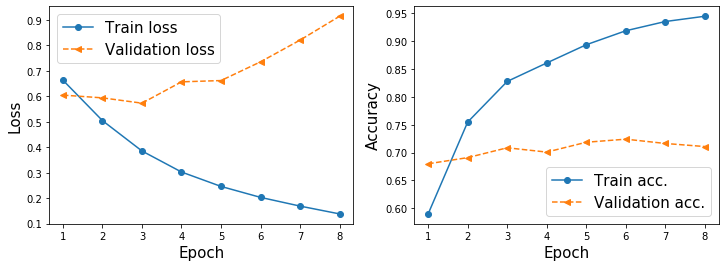

In [32]:
plot_train_valid(mlp_hist)

In [33]:
mlp_results = mlp_model.evaluate(ds_test.batch(test_size))
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*mlp_results))

1/1 [==============================] - 0s 51ms/step - loss: 0.9849 - accuracy: 0.7171
Test loss: 0.9849   Test Acc.: 0.7171


# Simple RNN network.

In [34]:
tf.random.set_seed(1)

embedding_dim = 100

rnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(nn_input_shape, 
                              embedding_dim,
                              name = 'embedding'),
    tf.keras.layers.SimpleRNN(100, 
                              return_sequences=True,
                              name = 'simple_rnn1'),
    tf.keras.layers.SimpleRNN(100, 
                              return_sequences=False,
                              name = 'simple_rnn2'),
    tf.keras.layers.Dense(100, 
                          activation = 'relu',
                          name = 'dense1'),
    tf.keras.layers.Dense(2, 
                          activation = 'softmax',
                          name = 'output')])

rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         261400    
_________________________________________________________________
simple_rnn1 (SimpleRNN)      (None, None, 100)         20100     
_________________________________________________________________
simple_rnn2 (SimpleRNN)      (None, 100)               20100     
_________________________________________________________________
dense1 (Dense)               (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 311,902
Trainable params: 311,902
Non-trainable params: 0
_________________________________________________________________


In [0]:
rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [36]:
rnn_hist = fitting_neural_network(rnn_model, batch=8, epochs=5)

Train for 264.0 steps, validate for 114.0 steps
Epoch 1/5
264/264 [==============================] - 1128s 4s/step - loss: 0.7240 - accuracy: 0.4872 - val_loss: 0.6927 - val_accuracy: 0.5493
Epoch 2/5
264/264 [==============================] - 1137s 4s/step - loss: 0.7042 - accuracy: 0.5118 - val_loss: 0.6893 - val_accuracy: 0.5493
Epoch 3/5
264/264 [==============================] - 1167s 4s/step - loss: 0.6976 - accuracy: 0.5090 - val_loss: 0.7059 - val_accuracy: 0.4496
Epoch 4/5
264/264 [==============================] - 1169s 4s/step - loss: 0.6934 - accuracy: 0.5317 - val_loss: 0.6887 - val_accuracy: 0.5482
Epoch 5/5
264/264 [==============================] - 1156s 4s/step - loss: 0.6940 - accuracy: 0.5090 - val_loss: 0.6921 - val_accuracy: 0.5471


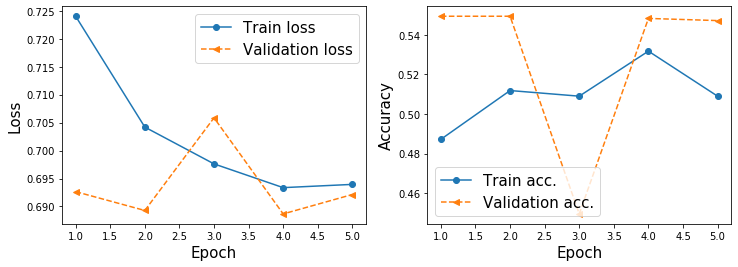

In [37]:
plot_train_valid(rnn_hist)

In [38]:
# evaluate on the test data
rnn_results = rnn_model.evaluate(ds_test.batch(10))
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*rnn_results))

202/202 [==============================] - 72s 358ms/step - loss: 0.6926 - accuracy: 0.5296
Test loss: 0.6926   Test Acc.: 0.5296


# Bidirectional with LSTM layer.

In [44]:
embedding_dim = 100
vocab_size = nn_input_shape + 2

bi_lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,
                              output_dim=embedding_dim,
                              name='embed-layer'),
    
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(100, 
                             name='lstm-layer'),
                             name='bidir-lstm'), 

    tf.keras.layers.Dense(100, 
                          activation='relu'),
    
    tf.keras.layers.Dense(2, 
                          activation = 'softmax',
                          name = 'output')
])

bi_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed-layer (Embedding)      (None, None, 100)         258100    
_________________________________________________________________
bidir-lstm (Bidirectional)   (None, 200)               160800    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 439,202
Trainable params: 439,202
Non-trainable params: 0
_________________________________________________________________


In [0]:
bi_lstm_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [46]:
bi_lstm_hist = fitting_neural_network(bi_lstm_model, batch=2, epochs=5)

Train for 1056.0 steps, validate for 453.0 steps
Epoch 1/5
1056/1056 [==============================] - 174s 165ms/step - loss: 0.6928 - accuracy: 0.5298 - val_loss: 0.6925 - val_accuracy: 0.5177
Epoch 2/5
1056/1056 [==============================] - 171s 162ms/step - loss: 0.6918 - accuracy: 0.5350 - val_loss: 0.6926 - val_accuracy: 0.5166
Epoch 3/5
1056/1056 [==============================] - 171s 162ms/step - loss: 0.6909 - accuracy: 0.5175 - val_loss: 0.6940 - val_accuracy: 0.5166
Epoch 4/5
1056/1056 [==============================] - 172s 163ms/step - loss: 0.6928 - accuracy: 0.5308 - val_loss: 0.6938 - val_accuracy: 0.5177
Epoch 5/5
1056/1056 [==============================] - 170s 161ms/step - loss: 0.6912 - accuracy: 0.5365 - val_loss: 0.6928 - val_accuracy: 0.5166


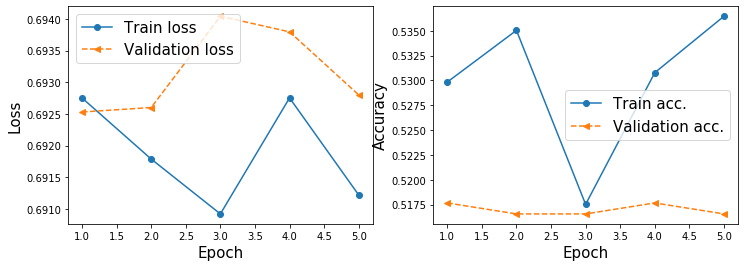

In [49]:
plot_train_valid(bi_lstm_hist)

In [50]:
# evaluate bi_lstm_model on the test data
bi_lstm_results = bi_lstm_model.evaluate(ds_test.batch(10))
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*bi_lstm_results))

202/202 [==============================] - 13s 66ms/step - loss: 0.6917 - accuracy: 0.5296
Test loss: 0.6917   Test Acc.: 0.5296
